In [1]:
from numpy import cos, sin, pi, absolute, arange, zeros
from scipy.signal import hamming,firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


FIR Low Pass Filter Coefficients h[n]= [-0.00594298 -0.04885196 -0.17160345  0.74261107 -0.17160345 -0.04885196
 -0.00594298]
Normalized digital cut-off frequency 0.25
Digital cut-off frequency 0.7853981633974483
FIR Low Pass Filter coefficients using formula h[n]= [0.00848698 0.06976398 0.2450616  0.3535     0.2450616  0.06976398
 0.00848698]


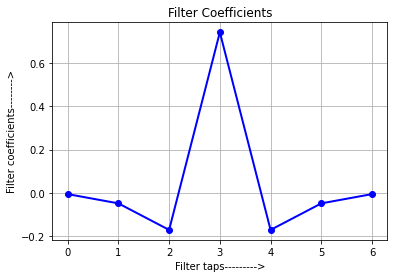

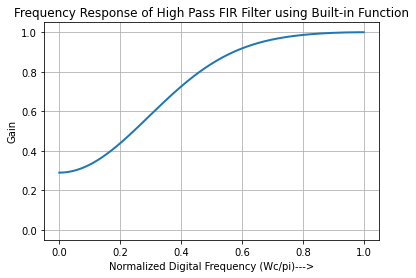

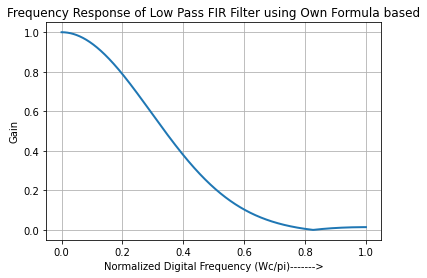

In [4]:
N = eval(input('Enter the filter order N='))

fc = eval(input('Enter the cutoff frequency='))
Fs = eval(input('Enter the sampling frequency='))
FN = 2*fc    #Nyquist rate


# Use firwin with a Hamming window to create a lowpass FIR filter.
# taps = firwin(N, fc/Fs, window=('hamming'))
taps = firwin(N, fc/Fs, pass_zero=False,window=('hamming'))
# True for HP and False for LP

print('FIR Low Pass Filter Coefficients h[n]=',taps)

#Hamming window generation
wn = hamming(N)
print('Normalized digital cut-off frequency',fc/Fs)
wc = (fc/Fs)*pi
print('Digital cut-off frequency',wc)
K = 1.414  #gain
#FIR filter cofficients generated from formula directly
Tuo = (N-1)/2
hd  = zeros(N)
h   = zeros(N)
for n in range(N):
    if n==Tuo:
        hd[n] = wc/pi
        
    else:
        hd[n] = sin(wc*(n-Tuo))/(pi*(n-Tuo))
    h[n] = hd[n]*wn[n]
    h[n] = h[n]*K
print('FIR Low Pass Filter coefficients using formula h[n]=',h)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
xlabel('Filter Order')
ylabel('Filter coefficients')
title('Filter Coefficients')
grid(True)

#------------------------------------------------------------------
# Plot the magnitude response of the filter using Built-in function
#------------------------------------------------------------------

figure(2)
clf()


# W,H = freqz(taps, worN=8000)
# plot((W/max(W)), absolute(H), linewidth=2)
# #plot((W/max(W))*Fs,absolute(H), linewidth=2)
# #xlabel('Frequency (Hz)')
# xlabel('Normalized Digital Frequency (Wc/pi)')
# ylabel('Gain')
# title('Frequency Response of Low Pass FIR Filter using Built-in Function')
# ylim(-0.05, 1.05)
# grid(True)

# del W
# del H

W,H = freqz(taps, worN=8000)
plot((W/max(W)), absolute(H), linewidth=2)
#plot((W/max(W))*Fs,absolute(H), linewidth=2)
#xlabel('Frequency (Hz)')
xlabel('Normalized Digital Frequency (Wc/pi)')
ylabel('Gain')
title('Frequency Response of High Pass FIR Filter using Built-in Function')
ylim(-0.05, 1.05)
grid(True)

del W
del H
#------------------------------------------------------------------
# Plot the magnitude response of the filter using own function
#------------------------------------------------------------------

figure(3)
clf()
W,H = freqz(h, worN=8000)
plot((W/max(W)),absolute(H), linewidth=2)
#plot((W/max(W))*Fs,absolute(H), linewidth=2)
#xlabel('Frequency in Hz------->')
xlabel('Normalized Digital Frequency (Wc/pi)')
ylabel('Gain')
title('Frequency Response of Low Pass FIR Filter using Own Formula based')
ylim(-0.05,1.05)
grid(True)
show()